In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [116]:
def get_results_from_json(json_file, metric):
	with open(json_file, 'r') as f:
		data = json.load(f)

		scores = {}
		for category, category_data in data["results"].items():

		# Extract the Brier score from the category data
			score = category_data.get(f"{metric},none")
			if score is not None:
				scores[category] = score 
	return scores

In [117]:
t5_v1_1_small_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
t5_v1_1_small_acc = get_results_from_json(t5_v1_1_small_mmlu_path , "acc")
t5_v1_1_small_rmsce = get_results_from_json(t5_v1_1_small_mmlu_path , "rmsce")
# t5_v1_1_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# t5_v1_1_base_acc = get_results_from_json(t5_v1_1_base_mmlu_path , "acc")
# t5_v1_1_base_rmsce = get_results_from_json(t5_v1_1_base_mmlu_path , "rmsce")
t5_v1_1_large_mmlu_path = "safety_vs_capabilities/lm_evals/t5-v1_1-large/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-large/results_2024-05-31T04-51-55.118008.json"
t5_v1_1_large_acc = get_results_from_json(t5_v1_1_large_mmlu_path , "acc")
t5_v1_1_large_rmsce = get_results_from_json(t5_v1_1_large_mmlu_path , "rmsce")
t5_v1_1_xl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xl/results_2024-05-31T05-44-55.178948.json"
t5_v1_1_xl_acc = get_results_from_json(t5_v1_1_xl_mmlu_path , "acc")
t5_v1_1_xl_rmsce = get_results_from_json(t5_v1_1_xl_mmlu_path , "rmsce")
# t5_v1_1_xxl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# t5_v1_1_xxl_acc = get_results_from_json(t5_v1_1_xxl_mmlu_path , "acc")
# t5_v1_1_xxl_rmsce = get_results_from_json(t5_v1_1_xxl_mmlu_path , "rmsce")

# flan_t5_small_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# flan_t5_small_acc = get_results_from_json(flan_t5_small_mmlu_path, "acc")
# flan_t5_small_rmsce = get_results_from_json(flan_t5_small_mmlu_path, "rmsce")
# flan_t5_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# flan_t5_base_acc = get_results_from_json(flan_t5_base_mmlu_path, "acc")
# flan_t5_base_rmsce = get_results_from_json(flan_t5_base_mmlu_path, "rmsce")
# flan_t5_large_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# flan_t5_large_acc = get_results_from_json(flan_t5_large_mmlu_path, "acc")
# flan_t5_large_rmsce = get_results_from_json(flan_t5_large_mmlu_path, "rmsce")
# flan_t5_xl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# flan_t5_xl_acc = get_results_from_json(flan_t5_xl_mmlu_path, "acc")
# flan_t5_xl_rmsce = get_results_from_json(flan_t5_xl_mmlu_path, "rmsce")
# flan_t5_xxl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
# flan_t5_xxl_acc = get_results_from_json(flan_t5_xxl_mmlu_path, "acc")
# flan_t5_xxl_rmsce = get_results_from_json(flan_t5_xxl_mmlu_path, "rmsce")

gemma_2b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-2b/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-2b/results_2024-05-30T22-52-02.925599.json"
gemma_2b_acc = get_results_from_json(gemma_2b_mmlu_path, "acc")
gemma_2b_rmsce = get_results_from_json(gemma_2b_mmlu_path, "rmsce")
# gemma_1_1_2b_it_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-1.1-2b-it/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-2b/results_2024-05-30T22-52-02.925599.json"
# gemma_1_1_2b_it_acc = get_results_from_json(gemma_1_1_2b_it_mmlu_path, "acc")
# gemma_1_1_2b_it_rmsce = get_results_from_json(gemma_1_1_2b_it_mmlu_path, "rmsce")
gemma_7b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-7b/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-7b/results_2024-05-30T23-03-14.099230.json"
gemma_7b_acc = get_results_from_json(gemma_7b_mmlu_path, "acc")
gemma_7b_rmsce = get_results_from_json(gemma_7b_mmlu_path, "rmsce")
# gemma_1_1_7b_it_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-1.1-7b-it/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-7b/results_2024-05-30T23-03-14.099230.json"
# gemma_1_1_7b_it_acc = get_results_from_json(gemma_1_1_7b_it_mmlu_path, "acc")
# gemma_1_1_7b_it_rmsce = get_results_from_json(gemma_1_1_7b_it_mmlu_path, "rmsce")

gpt_2_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gpt-2/result-mmlu-all.jsonl/__data__public_models__huggingface__openai-community__gpt2/results_2024-05-30T22-49-22.215985.json"
gpt_2_acc = get_results_from_json(gpt_2_mmlu_path, "acc")
gpt_2_rmsce = get_results_from_json(gpt_2_mmlu_path, "rmsce")

pythia_14m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-14m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-14m/results_2024-05-30T20-23-25.995550.json"
pythia_14m_acc = get_results_from_json(pythia_14m_mmlu_path, "acc")
pythia_14m_rmsce = get_results_from_json(pythia_14m_mmlu_path, "rmsce")
pythia_70m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-70m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-70m-deduped/results_2024-05-30T22-47-05.558672.json"
pythia_70m_acc = get_results_from_json(pythia_70m_mmlu_path, "acc")
pythia_70m_rmsce = get_results_from_json(pythia_70m_mmlu_path, "rmsce")
pythia_160m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-160m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-160m-deduped/results_2024-05-30T22-48-32.946070.json"
pythia_160m_acc = get_results_from_json(pythia_160m_mmlu_path, "acc")
pythia_160m_rmsce = get_results_from_json(pythia_160m_mmlu_path, "rmsce")
pythia_410m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-410m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-410m-deduped/results_2024-05-30T22-51-33.029216.json"
pythia_410m_acc = get_results_from_json(pythia_410m_mmlu_path, "acc")
pythia_410m_rmsce = get_results_from_json(pythia_410m_mmlu_path, "rmsce")
pythia_1b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1b/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-1b-deduped/results_2024-05-30T20-46-57.218047.json"
pythia_1b_acc = get_results_from_json(pythia_1b_mmlu_path, "acc")
pythia_1b_rmsce = get_results_from_json(pythia_1b_mmlu_path, "rmsce")
pythia_1_4b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1.4b/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-1.4b-deduped/results_2024-05-31T05-05-53.744727.json"
pythia_1_4b_acc = get_results_from_json(pythia_1_4b_mmlu_path, "acc")
pythia_1_4b_rmsce = get_results_from_json(pythia_1_4b_mmlu_path, "rmsce")
pythia_2_8b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-2.8b/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-2.8b-deduped/results_2024-05-31T05-12-19.518186.json"
pythia_2_8b_acc = get_results_from_json(pythia_2_8b_mmlu_path, "acc")
pythia_2_8b_rmsce = get_results_from_json(pythia_2_8b_mmlu_path, "rmsce")
pythia_6_9b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-6.9b/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-6.9b-deduped/results_2024-05-31T05-19-30.486649.json"
pythia_6_9b_acc = get_results_from_json(pythia_6_9b_mmlu_path, "acc")
pythia_6_9b_rmsce = get_results_from_json(pythia_6_9b_mmlu_path, "rmsce")
pythia_12b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-12b/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-12b-deduped/results_2024-05-31T05-33-00.453886.json"
pythia_12b_acc = get_results_from_json(pythia_12b_mmlu_path, "acc")
pythia_12b_rmsce = get_results_from_json(pythia_12b_mmlu_path, "rmsce")

mistral_7b_v01_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Mistral-7B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mistral-7B-v0.1/results_2024-05-30T21-55-31.393603.json"
mistral_7b_v01_acc = get_results_from_json(mistral_7b_v01_mmlu_path, "acc")
mistral_7b_v01_rmsce = get_results_from_json(mistral_7b_v01_mmlu_path, "rmsce")
# mistral_7b_instruct_v02_mmlu_path = ""
# mistral_7b_instruct_v02_acc = get_results_from_json(mistral_7b_instruct_v02_mmlu_path, "acc")
# mistral_7b_instruct_v02_rmsce = get_results_from_json(mistral_7b_instruct_v02_mmlu_path, "rmsce")
# mixtral_8x7b_v01_mmlu_path = ""
# mixtral_8x7b_v01_acc = get_results_from_json(mixtral_8x7b_v01_mmlu_path, "acc")
# mixtral_8x7b_v01_rmsce = get_results_from_json(mixtral_8x7b_v01_mmlu_path, "rmsce")
# mixtral_8x7b_instruct_v01_mmlu_path = ""
# mixtral_8x7b_instruct_v01_acc = get_results_from_json(mixtral_8x7b_instruct_v01_mmlu_path, "acc")
# mixtral_8x7b_instruct_v01_rmsce = get_results_from_json(mixtral_8x7b_instruct_v01_mmlu_path, "rmsce")
# mixtral_8x22b_v01_mmlu_path = ""
# mixtral_8x22b_v01_acc = get_results_from_json(mixtral_8x22b_v01_mmlu_path, "acc")
# mixtral_8x22b_v01_rmsce = get_results_from_json(mixtral_8x22b_v01_mmlu_path, "rmsce")
# mixtral_8x22b_instruct_v01_mmlu_path = ""
# mixtral_8x22b_instruct_v01_acc = get_results_from_json(mixtral_8x22b_instruct_v01_mmlu_path, "acc")
# mixtral_8x22b_instruct_v01_rmsce = get_results_from_json(mixtral_8x22b_instruct_v01_mmlu_path, "rmsce")

llama_2_7b_hf_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-7b-hf/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-7b-hf/results_2024-05-30T23-02-11.213172.json"
llama_2_7b_hf_acc = get_results_from_json(llama_2_7b_hf_mmlu_path, "acc")
llama_2_7b_hf_rmsce = get_results_from_json(llama_2_7b_hf_mmlu_path, "rmsce")
# llama_2_7b_chat_hf_mmlu_path = ""
# llama_2_7b_chat_hf_acc = get_results_from_json(llama_2_7b_chat_hf_mmlu_path, "acc")
# llama_2_7b_hf_rmsce = get_results_from_json(llama_2_7b_chat_hf_mmlu_path, "rmsce")
llama_2_13b_hf_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-05-30T21-30-53.042523.json"
llama_2_13b_hf_acc = get_results_from_json(llama_2_13b_hf_mmlu_path, "acc")
llama_2_13b_hf_rmsce = get_results_from_json(llama_2_13b_hf_mmlu_path, "rmsce")
# llama_2_13b_chat_hf_mmlu_path = ""
# llama_2_13b_chat_hf_acc = get_results_from_json(llama_2_13b_chat_hf_mmlu_path, "acc")
# llama_2_13b_chat_hf_rmsce = get_results_from_json(llama_2_13b_chat_hf_mmlu_path, "rmsce")

meta_llama_3_8B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-8B/results_2024-05-30T23-01-26.924420.json"
meta_llama_3_8B_acc = get_results_from_json(meta_llama_3_8B_mmlu_path, "acc")
meta_llama_3_8B_rmsce = get_results_from_json(meta_llama_3_8B_mmlu_path, "rmsce")
# meta_llama_3_8B_instruct_mmlu_path = ""
# meta_llama_3_8B_instruct_acc = get_results_from_json(meta_llama_3_8B_instruct_mmlu_path, "acc")
# meta_llama_3_8B_instruct_rmsce = get_results_from_json(meta_llama_3_8B_instruct_mmlu_path, "rmsce")
# meta_llama_3_70B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B-Instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-8B/results_2024-05-30T23-01-26.924420.json"
# meta_llama_3_70B_acc = get_results_from_json(meta_llama_3_70B_mmlu_path, "acc")
# meta_llama_3_70B_rmsce = get_results_from_json(meta_llama_3_70B_mmlu_path, "rmsce")
# meta_llama_3_70B_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B-Instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-8B/results_2024-05-30T23-01-26.924420.json"
# meta_llama_3_70B_instruct_acc = get_results_from_json(meta_llama_3_70B_instruct_mmlu_path, "acc")
# meta_llama_3_70B_instruct_rmsce = get_results_from_json(meta_llama_3_70B_instruct_mmlu_path, "rmsce")

qwen1_5_0_5B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-0.5B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-0.5B/results_2024-05-30T22-50-24.959145.json"
qwen1_5_0_5B_acc = get_results_from_json(qwen1_5_0_5B_mmlu_path, "acc")
qwen1_5_0_5B_rmsce = get_results_from_json(qwen1_5_0_5B_mmlu_path, "rmsce")
# qwen1_5_0_5B_chat_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-0.5B-Chat/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-0.5B/results_2024-05-30T22-50-24.959145.json"
# qwen1_5_0_5B_chat_acc = get_results_from_json(qwen1_5_0_5B_chat_mmlu_path, "acc")
# qwen1_5_0_5B_chat_rmsce = get_results_from_json(qwen1_5_0_5B_chat_mmlu_path, "rmsce")
qwen1_5_1_8B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-1.8B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-05-30T22-51-21.639045.json"
qwen1_5_1_8B_acc = get_results_from_json(qwen1_5_1_8B_mmlu_path, "acc")
qwen1_5_1_8B_rmsce = get_results_from_json(qwen1_5_1_8B_mmlu_path, "rmsce")
# qwen1_5_1_8B_chat_mmlu_path = "safety_vs_capabilities/lm_evals/Qwen1.5-1.8B-Chat/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-05-30T22-51-21.639045.json"
# qwen1_5_1_8B_chat_acc = get_results_from_json(qwen1_5_1_8B_chat_mmlu_path, "acc")
# qwen1_5_1_8B_chat_rmsce = get_results_from_json(qwen1_5_1_8B_chat_mmlu_path, "rmsce")
qwen1_5_4B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-4B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-4B/results_2024-05-31T04-43-12.569673.json"
qwen1_5_4B_acc = get_results_from_json(qwen1_5_4B_mmlu_path, "acc")
qwen1_5_4B_rmsce = get_results_from_json(qwen1_5_4B_mmlu_path, "rmsce")
# qwen1_5_4B_chat_mmlu_path = ""
# qwen1_5_4B_chat_acc = get_results_from_json(qwen1_5_4B_chat_mmlu_path, "acc")
# qwen1_5_4B_chat_rmsce = get_results_from_json(qwen1_5_4B_chat_mmlu_path, "rmsce")
qwen1_5_7B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-7B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-7B/results_2024-05-31T04-52-33.487087.json"
qwen1_5_7B_acc = get_results_from_json(qwen1_5_7B_mmlu_path, "acc")
qwen1_5_7B_rmsce = get_results_from_json(qwen1_5_7B_mmlu_path, "rmsce")
# qwen1_5_7B_chat_mmlu_path = ""
# qwen1_5_7B_chat_acc = get_results_from_json(qwen1_5_7B_chat_mmlu_path, "acc")
# qwen1_5_7B_chat_rmsce = get_results_from_json(qwen1_5_7B_chat_mmlu_path, "rmsce")
qwen1_5_14B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-14B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-14B/results_2024-05-31T05-18-47.418803.json"
qwen1_5_14B_acc = get_results_from_json(qwen1_5_14B_mmlu_path, "acc")
qwen1_5_14B_rmsce = get_results_from_json(qwen1_5_14B_mmlu_path, "rmsce")
# qwen1_5_14B_chat_mmlu_path = ""
# qwen1_5_14B_chat_acc = get_results_from_json(qwen1_5_14B_chat_mmlu_path, "acc")
# qwen1_5_14B_chat_rmsce = get_results_from_json(qwen1_5_14B_chat_mmlu_path, "rmsce")
qwen1_5_32B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-32B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-32B/results_2024-05-31T05-51-22.740368.json"
qwen1_5_32B_acc = get_results_from_json(qwen1_5_32B_mmlu_path, "acc")
qwen1_5_32B_rmsce = get_results_from_json(qwen1_5_32B_mmlu_path, "rmsce")
# qwen1_5_32B_chat_mmlu_path = ""
# qwen1_5_32B_chat_acc = get_results_from_json(qwen1_5_32B_chat_mmlu_path, "acc")
# qwen1_5_32B_chat_rmsce = get_results_from_json(qwen1_5_32B_chat_mmlu_path, "rmsce")
# qwen1_5_72B_mmlu_path = ""
# qwen1_5_72B_acc = get_results_from_json(qwen1_5_72B_mmlu_path, "acc")
# qwen1_5_72B_rmsce = get_results_from_json(qwen1_5_72B_mmlu_path, "rmsce")
# qwen1_5_72B_chat_mmlu_path = ""
# qwen1_5_72B_chat_acc = get_results_from_json(qwen1_5_72B_chat_mmlu_path, "acc")
# qwen1_5_72B_chat_rmsce = get_results_from_json(qwen1_5_72B_chat_mmlu_path, "rmsce")
# qwen1_5_110B_mmlu_path = ""
# qwen1_5_110B_acc = get_results_from_json(qwen1_5_110B_mmlu_path, "acc")
# qwen1_5_110B_rmsce = get_results_from_json(qwen1_5_110B_mmlu_path, "rmsce")
# qwen1_5_110B_chat_mmlu_path = ""
# qwen1_5_110B_chat_acc = get_results_from_json(qwen1_5_110B_chat_mmlu_path, "acc")
# qwen1_5_110B_chat_rmsce = get_results_from_json(qwen1_5_110B_chat_mmlu_path, "rmsce")

yi_6B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-6B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-6B/results_2024-05-30T22-16-37.475327.json"
yi_6B_acc = get_results_from_json(yi_6B_mmlu_path, "acc")
yi_6B_rmsce = get_results_from_json(yi_6B_mmlu_path, "rmsce")
# yi_6B_chat_mmlu_path = ""
# yi_6B_chat_acc = get_results_from_json(yi_6B_chat_mmlu_path, "acc")
# yi_6B_chat_rmsce = get_results_from_json(yi_6B_chat_mmlu_path, "rmsce")
yi_9B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-9B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-9B/results_2024-05-31T04-48-22.825093.json"
yi_9B_acc = get_results_from_json(yi_9B_mmlu_path, "acc")
yi_9B_rmsce = get_results_from_json(yi_9B_mmlu_path, "rmsce")
yi_34B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-34B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-34B/results_2024-05-31T05-37-19.293942.json"
yi_34B_acc = get_results_from_json(yi_34B_mmlu_path, "acc")
yi_34B_rmsce = get_results_from_json(yi_34B_mmlu_path, "rmsce")
# yi_34B_chat_mmlu_path = ""
# yi_34B_chat_acc = get_results_from_json(yi_34B_chat_mmlu_path, "acc")
# yi_34B_chat_rmsce = get_results_from_json(yi_34B_chat_mmlu_path, "rmsce")

deepseek_7b_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-7b-base/result-mmlu-all.jsonl/__data__public_models__huggingface__deepseek-ai__deepseek-llm-7b-base/results_2024-05-30T23-03-52.161663.json"
deepseek_7b_base_acc = get_results_from_json(deepseek_7b_base_mmlu_path, "acc")
deepseek_7b_base_rmsce = get_results_from_json(deepseek_7b_base_mmlu_path, "rmsce")
# deepseek_7b_chat_mmlu_path = ""
# deepseek_7b_chat_acc = get_results_from_json(deepseek_7b_chat_mmlu_path, "acc")
# deepseek_7b_chat_rmsce = get_results_from_json(deepseek_7b_chat_mmlu_path, "rmsce")
# deepseek_67b_base_mmlu_path = ""
# deepseek_67b_base_acc = get_results_from_json(deepseek_67b_base_mmlu_path, "acc")
# deepseek_67b_base_rmsce = get_results_from_json(deepseek_67b_base_mmlu_path, "rmsce")
# deepseek_67b_chat_mmlu_path = ""
# deepseek_67b_chat_acc = get_results_from_json(deepseek_67b_chat_mmlu_path, "acc")
# deepseek_67b_chat_rmsce = get_results_from_json(deepseek_67b_chat_mmlu_path, "rmsce")

falcon_7b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
falcon_7b_acc = get_results_from_json(falcon_7b_mmlu_path, "acc")
falcon_7b_rmsce = get_results_from_json(falcon_7b_mmlu_path, "rmsce")
# falcon_7b_instruct_mmlu_path = ""
# falcon_7b_instruct_acc = get_results_from_json(falcon_7b_instruct_mmlu_path, "acc")
# falcon_7b_instruct_rmsce = get_results_from_json(falcon_7b_instruct_mmlu_path, "rmsce")
# falcon_40b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_40b_acc = get_results_from_json(falcon_40b_mmlu_path, "acc")
# falcon_40b_rmsce = get_results_from_json(falcon_40b_mmlu_path, "rmsce")
# falcon_40b_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b-instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_40b_instruct_acc = get_results_from_json(falcon_40b_instruct_mmlu_path, "acc")
# falcon_40b_instruct_rmsce = get_results_from_json(falcon_40b_instruct_mmlu_path, "rmsce")
# falcon_180b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_180b_acc = get_results_from_json(falcon_180b_mmlu_path, "acc")
# falcon_180b_rmsce = get_results_from_json(falcon_180b_mmlu_path, "rmsce")
# falcon_180b_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b-instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_180b_instruct_acc = get_results_from_json(falcon_180b_instruct_mmlu_path, "acc")
# falcon_180b_instruct_rmsce = get_results_from_json(falcon_180b_instruct_mmlu_path, "rmsce")

#### Plotting for only task average performance

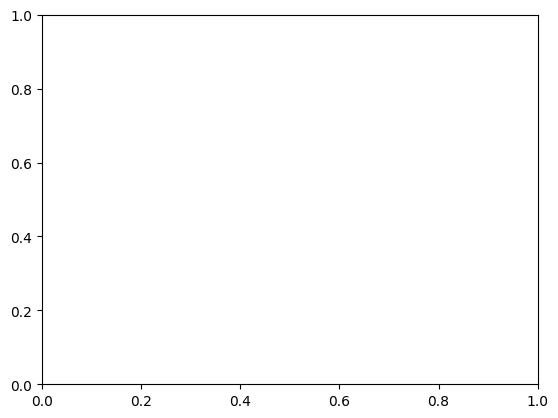

In [118]:
fig, ax = plt.subplots()

# flan_t5_small_mmlu_acc = np.array(list(flan_t5_small_acc.values())[0])
# flan_t5_small_mmlu_rmsce = np.array(list(flan_t5_small_rmsce.values())[0])
# flan_t5_base_mmlu_acc = np.array(list(flan_t5_base_acc.values())[0])
# flan_t5_base_mmlu_rmsce = np.array(list(flan_t5_base_rmsce.values())[0])
# flan_t5_large_mmlu_acc = np.array(list(flan_t5_large_acc.values())[0])
# flan_t5_large_mmlu_rmsce = np.array(list(flan_t5_large_rmsce.values())[0])
# flan_t5_xl_mmlu_acc = np.array(list(flan_t5_xl_acc.values())[0])
# flan_t5_xl_mmlu_rmsce = np.array(list(flan_t5_xl_rmsce.values())[0])
# flan_t5_xxl_mmlu_acc = np.array(list(flan_t5_xxl_acc.values())[0])
# flan_t5_xxl_mmlu_rmsce = np.array(list(flan_t5_xxl_rmsce.values())[0])

t5_v1_1_small_mmlu_acc = np.array(list(t5_v1_1_small_acc.values())[0])
t5_v1_1_small_mmlu_rmsce = np.array(list(t5_v1_1_small_rmsce.values())[0])
# t5_v1_1_base_mmlu_acc = np.array(list(t5_v1_1_base_acc.values())[0])
# t5_v1_1_base_mmlu_rmsce = np.array(list(t5_v1_1_base_rmsce.values())[0])
t5_v1_1_large_mmlu_acc = np.array(list(t5_v1_1_large_acc.values())[0])
t5_v1_1_large_mmlu_rmsce = np.array(list(t5_v1_1_large_rmsce.values())[0])
t5_v1_1_xl_mmlu_acc = np.array(list(t5_v1_1_xl_acc.values())[0])
t5_v1_1_xl_mmlu_rmsce = np.array(list(t5_v1_1_xl_rmsce.values())[0])
# t5_v1_1_xxl_mmlu_acc = np.array(list(t5_v1_1_xxl_acc.values())[0])
# t5_v1_1_xxl_mmlu_rmsce = np.array(list(t5_v1_1_xxl_rmsce.values())[0])

pythia_14m_mmlu_acc = np.array(list(pythia_14m_acc.values())[0])
pythia_14m_mmlu_rmsce = np.array(list(pythia_14m_rmsce.values())[0])
pythia_70m_mmlu_acc = np.array(list(pythia_70m_acc.values())[0])
pythia_70m_mmlu_rmsce = np.array(list(pythia_70m_rmsce.values())[0])
pythia_160m_mmlu_acc = np.array(list(pythia_160m_acc.values())[0])
pythia_160m_mmlu_rmsce = np.array(list(pythia_160m_rmsce.values())[0])
pythia_410m_mmlu_acc = np.array(list(pythia_410m_acc.values())[0])
pythia_410m_mmlu_rmsce = np.array(list(pythia_410m_rmsce.values())[0])
pythia_1b_mmlu_acc = np.array(list(pythia_1b_acc.values())[0])
pythia_1b_mmlu_rmsce = np.array(list(pythia_1b_rmsce.values())[0])
pythia_1_4b_mmlu_acc = np.array(list(pythia_1_4b_acc.values())[0])
pythia_1_4b_mmlu_rmsce = np.array(list(pythia_1_4b_rmsce.values())[0])
pythia_2_8b_mmlu_acc = np.array(list(pythia_2_8b_acc.values())[0])
pythia_2_8b_mmlu_rmsce = np.array(list(pythia_2_8b_rmsce.values())[0])
pythia_6_9b_mmlu_acc = np.array(list(pythia_6_9b_acc.values())[0])
pythia_6_9b_mmlu_rmsce = np.array(list(pythia_6_9b_rmsce.values())[0])
pythia_12b_mmlu_acc = np.array(list(pythia_12b_acc.values())[0])
pythia_12b_mmlu_rmsce = np.array(list(pythia_12b_rmsce.values())[0])

mistral_7b_v01_mmlu_acc = np.array(list(mistral_7b_v01_acc.values())[0])
mistral_7b_v01_mmlu_rmsce = np.array(list(mistral_7b_v01_rmsce.values())[0])
# mistral_7b_instruct_v02_mmlu_acc = np.array(list(mistral_7b_instruct_v02_acc.values())[0])
# mistral_7b_instruct_v02_mmlu_rmsce = np.array(list(mistral_7b_instruct_v02_rmsce.values())[0])
# mixtral_8x7b_v01_mmlu_acc = np.arry(list(mixtral_8x7b_v01_acc.values())[0])
# mixtral_8x7b_v01_mmlu_rmsce = np.arry(list(mixtral_8x7b_v01_rmsce.values())[0])
# mixtral_8x7b_instruct_v01_mmlu_acc = np.arry(list(mixtral_8x7b_instruct_v01_acc.values())[0])
# mixtral_8x7b_instruct_v01_mmlu_acc = np.arry(list(mixtral_8x7b_instruct_v01_acc.values())[0])
# mixtral_8x22b_v01_mmlu_acc = np.arry(list(mixtral_8x22b_v01_acc.values())[0])
# mixtral_8x22b_v01_mmlu_rmsce = np.arry(list(mixtral_8x22b_v01_rmsce.values())[0])
# mixtral_8x22b_instruct_v01_mmlu_acc = np.arry(list(mixtral_8x22b_instruct_v01_acc.values())[0])
# mixtral_8x22b_instruct_v01_mmlu_acc = np.arry(list(mixtral_8x22b_instruct_v01_acc.values())[0])

llama_2_7b_hf_mmlu_acc = np.array(list(llama_2_7b_hf_acc.values())[0])
llama_2_7b_hf_mmlu_rmsce = np.array(list(llama_2_7b_hf_rmsce.values())[0])
# llama_2_7b_chat_hf_mmlu_acc = np.array(list(llama_2_7b_chat_hf_acc.values())[0])
# llama_2_7b_chat_hf_mmlu_rmsce = np.array(list(llama_2_7b_chat_hf_rmsce.values())[0])
llama_2_13b_hf_mmlu_acc = np.array(list(llama_2_13b_hf_acc.values())[0])
llama_2_13b_hf_mmlu_rmsce = np.array(list(llama_2_13b_hf_rmsce.values())[0])
# llama_2_13b_chat_hf_mmlu_acc = np.array(list(llama_2_13b_chat_hf_acc.values())[0])
# llama_2_13b_chat_hf_mmlu_rmsce = np.array(list(llama_2_13b_chat_hf_rmsce.values())[0])
# llama_2_70b_hf_mmlu_acc = np.array(list(llama_2_70b_hf_acc.values())[0])
# llama_2_70b_hf_mmlu_rmsce = np.array(list(llama_2_70b_hf_rmsce.values())[0])
# llama_2_70b_chat_hf_mmlu_acc = np.array(list(llama_2_70b_chat_hf_acc.values())[0])
# llama_2_70b_chat_hf_mmlu_rmsce = np.array(list(llama_2_70b_chat_hf_rmsce.values())[0])

meta_llama_3_8B_mmlu_acc = np.array(list(meta_llama_3_8B_acc.values())[0])
meta_llama_3_8B_mmlu_rmsce = np.array(list(meta_llama_3_8B_rmsce.values())[0])
# meta_llama_3_8B_instruct_mmlu_acc = np.array(list(meta_llama_3_8B_instruct_acc.values())[0])
# meta_llama_3_8B_instruct_mmlu_rmsce = np.array(list(meta_llama_3_8B_instruct_rmsce.values())[0])
# meta_llama_3_70B_mmlu_acc = np.array(list(meta_llama_3_70B_acc.values())[0])
# meta_llama_3_70B_mmlu_rmsce = np.array(list(meta_llama_3_70B_rmsce.values())[0])
# meta_llama_3_70B_instruct_mmlu_acc = np.array(list(meta_llama_3_70B_instruct_acc.values())[0])
# meta_llama_3_70B_instruct_mmlu_rmsce = np.array(list(meta_llama_3_70B_instruct_rmsce.values())[0])

gemma_2b_mmlu_acc = np.array(list(gemma_2b_acc.values())[0])
gemma_2b_mmlu_rmsce = np.array(list(gemma_2b_rmsce.values())[0])
# gemma_1_1_2b_it_mmlu_acc = np.array(list(gemma_1_1_2b_it_acc.values())[0])
# gemma_1_1_2b_it_mmlu_rmsce = np.array(list(gemma_1_1_2b_it_rmsce.values())[0])
gemma_7b_mmlu_acc = np.array(list(gemma_7b_acc.values())[0])
gemma_7b_mmlu_rmsce = np.array(list(gemma_7b_rmsce.values())[0])
# gemma_1_1_7b_it_mmlu_acc = np.array(list(gemma_1_1_7b_it_acc.values())[0])
# gemma_1_1_7b_it_mmlu_rmsce = np.array(list(gemma_1_1_7b_it_rmsce.values())[0])

qwen1_5_0_5B_mmlu_acc = np.array(list(qwen1_5_0_5B_acc.values())[0])
qwen1_5_0_5B_mmlu_rmsce = np.array(list(qwen1_5_0_5B_rmsce.values())[0])
# qwen1_5_0_5B_chat_mmlu_acc = np.array(list(qwen1_5_0_5B_chat_acc.values())[0])
# qwen1_5_0_5B_chat_mmlu_rmsce = np.array(list(qwen1_5_0_5B_chat_rmsce.values())[0])
qwen1_5_1_8B_mmlu_acc = np.array(list(qwen1_5_1_8B_acc.values())[0])
qwen1_5_1_8B_mmlu_rmsce = np.array(list(qwen1_5_1_8B_rmsce.values())[0])
# qwen1_5_1_8B_chat_mmlu_acc = np.array(list(qwen1_5_1_8B_chat_acc.values())[0])
# qwen1_5_1_8B_chat_mmlu_rmsce = np.array(list(qwen1_5_1_8B_chat_rmsce.values())[0])
qwen1_5_4B_mmlu_acc = np.array(list(qwen1_5_4B_acc.values())[0])
qwen1_5_4B_mmlu_rmsce = np.array(list(qwen1_5_4B_rmsce.values())[0])
# qwen1_5_4B_chat_mmlu_acc = np.array(list(qwen1_5_4B_chat_acc.values())[0])
# qwen1_5_4B_chat_mmlu_rmsce = np.array(list(qwen1_5_4B_chat_rmsce.values())[0])
qwen1_5_7B_mmlu_acc = np.array(list(qwen1_5_7B_acc.values())[0])
qwen1_5_7B_mmlu_rmsce = np.array(list(qwen1_5_7B_rmsce.values())[0])
# qwen1_5_7B_chat_mmlu_acc = np.array(list(qwen1_5_7B_chat_acc.values())[0])
# qwen1_5_7B_chat_mmlu_rmsce = np.array(list(qwen1_5_7B_chat_rmsce.values())[0])
qwen1_5_14B_mmlu_acc = np.array(list(qwen1_5_14B_acc.values())[0])
qwen1_5_14B_mmlu_rmsce = np.array(list(qwen1_5_14B_rmsce.values())[0])
# qwen1_5_14B_chat_mmlu_acc = np.array(list(qwen1_5_14B_chat_acc.values())[0])
# qwen1_5_14B_chat_mmlu_rmsce = np.array(list(qwen1_5_14B_chat_rmsce.values())[0])
qwen1_5_32B_mmlu_acc = np.array(list(qwen1_5_32B_acc.values())[0])
qwen1_5_32B_mmlu_rmsce = np.array(list(qwen1_5_32B_rmsce.values())[0])
# qwen1_5_32B_chat_mmlu_acc = np.array(list(qwen1_5_32B_chat_acc.values())[0])
# qwen1_5_32B_chat_mmlu_rmsce = np.array(list(qwen1_5_32B_chat_rmsce.values())[0])
# qwen1_5_72B_mmlu_acc = np.array(list(qwen1_5_72B_acc.values())[0])
# qwen1_5_72B_mmlu_rmsce = np.array(list(qwen1_5_72B_rmsce.values())[0])
# qwen1_5_72B_chat_mmlu_acc = np.array(list(qwen1_5_72B_chat_acc.values())[0])
# qwen1_5_72B_chat_mmlu_rmsce = np.array(list(qwen1_5_72B_chat_rmsce.values())[0])
# qwen1_5_110B_mmlu_acc = np.array(list(qwen1_5_110B_acc.values())[0])
# qwen1_5_110B_mmlu_rmsce = np.array(list(qwen1_5_110B_rmsce.values())[0])
# qwen1_5_110B_chat_mmlu_acc = np.array(list(qwen1_5_110B_chat_acc.values())[0])
# qwen1_5_110B_chat_mmlu_rmsce = np.array(list(qwen1_5_110B_chat_rmsce.values())[0])

yi_6B_mmlu_acc = np.array(list(yi_6B_acc.values())[0])
yi_6B_mmlu_rmsce = np.array(list(yi_6B_rmsce.values())[0])
# yi_6B_chat_mmlu_acc = np.array(list(yi_6B_chat_acc.values())[0])
# yi_6B_chat_mmlu_rmsce = np.array(list(yi_6B_chat_rmsce.values())[0])
yi_9B_mmlu_acc = np.array(list(yi_9B_acc.values())[0])
yi_9B_mmlu_rmsce = np.array(list(yi_9B_rmsce.values())[0])
yi_34B_mmlu_acc = np.array(list(yi_34B_acc.values())[0])
yi_34B_mmlu_rmsce = np.array(list(yi_34B_rmsce.values())[0])
# yi_34B_chat_mmlu_acc = np.array(list(yi_34B_chat_acc.values())[0])
# yi_34B_chat_mmlu_rmsce = np.array(list(yi_34B_chat_rmsce.values())[0])

falcon_7b_mmlu_acc = np.array(list(falcon_7b_acc.values())[0])
falcon_7b_mmlu_rmsce = np.array(list(falcon_7b_rmsce.values())[0])
# falcon_7b_instruct_mmlu_acc = np.array(list(falcon_7b_instruct_acc.values())[0])
# falcon_7b_instruct_mmlu_rmsce = np.array(list(falcon_7b_instruct_rmsce.values())[0])
# falcon_40b_mmlu_acc = np.array(list(falcon_40b_acc.values())[0])
# falcon_40b_mmlu_rmsce = np.array(list(falcon_40b_rmsce.values())[0])
# falcon_40b_instruct_mmlu_acc = np.array(list(falcon_40b_instruct_acc.values())[0])
# falcon_40b_instruct_mmlu_rmsce = np.array(list(falcon_40b_instruct_rmsce.values())[0])
# falcon_180b_mmlu_acc = np.array(list(falcon_180b_acc.values())[0])
# falcon_180b_mmlu_rmsce = np.array(list(falcon_180b_rmsce.values())[0])
# falcon_180b_instruct_mmlu_acc = np.array(list(falcon_180b_instruct_acc.values())[0])
# falcon_180b_instruct_mmlu_rmsce = np.array(list(falcon_180b_instruct_rmsce.values())[0])

deepseek_7b_base_mmlu_acc = np.array(list(deepseek_7b_base_acc.values())[0])
deepseek_7b_base_mmlu_rmsce = np.array(list(deepseek_7b_base_rmsce.values())[0])
# deepseek_7b_chat_mmlu_acc = np.array(list(deepseek_7b_chat_acc.values())[0])
# deepseek_7b_chat_mmlu_rmsce = np.array(list(deepseek_7b_chat_rmsce.values())[0])
# deepseek_67b_base_mmlu_acc = np.array(list(deepseek_67b_base_acc.values())[0])
# deepseek_67b_base_mmlu_rmsce = np.array(list(deepseek_67b_base_rmsce.values())[0])
# deepseek_67b_chat_mmlu_acc = np.array(list(deepseek_67b_chat_acc.values())[0])
# deepseek_67b_chat_mmlu_rmsce = np.array(list(deepseek_67b_chat_rmsce.values())[0])

gpt_2_mmlu_acc = np.array(list(gpt_2_acc.values())[0])
gpt_2_mmlu_rmsce = np.array(list(gpt_2_rmsce.values())[0])

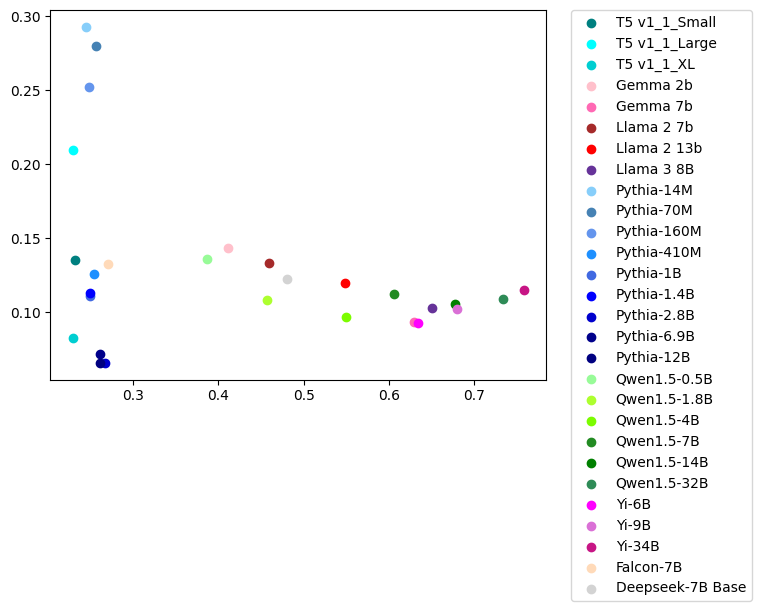

In [113]:
#Because matlplotlib cycles the same 10 colors, making custom colors for similar shades for the same family of models

# plt.scatter(flan_t5_small_mmlu_acc, flan_t5_small_mmlu_rmsce, label="Flan-T5_Small", color='lemonchiff')
# plt.scatter(flan_t5_base_mmlu_acc, flan_t5_base_mmlu_rmsce, label="Flan-T5_Base", color='yellow')
# plt.scatter(flan_t5_large_mmlu_acc, flan_t5_large_mmlu_rmsce, label="Flan-T5_Large", color='gold')
# plt.scatter(flan_t5_xl_mmlu_acc, flan_t5_xl_mmlu_rmsce, label="Flan-T5_XL", color='khaki')
# plt.scatter(flan_t5_xxl_mmlu_acc, flan_t5_xxl_mmlu_rmsce, label="Flan-T5_XXL", color='darkhaki')

plt.scatter(t5_v1_1_small_mmlu_acc, t5_v1_1_small_mmlu_rmsce, label="T5 v1_1_Small", color='teal')
# plt.scatter(t5_v1_1_base_mmlu_acc, t5_v1_1_base_mmlu_rmsce, label="T5 v1_1_Base", color='aqua')
plt.scatter(t5_v1_1_large_mmlu_acc, t5_v1_1_large_mmlu_rmsce, label="T5 v1_1_Large", color='cyan')
plt.scatter(t5_v1_1_xl_mmlu_acc, t5_v1_1_xl_mmlu_rmsce, label="T5 v1_1_XL", color='darkturquoise')
# plt.scatter(t5_v1_1_xxl_mmlu_acc, t5_v1_1_xxl_mmlu_rmsce, label="T5 v1_1_XXL", color='cadetblue')

plt.scatter(gemma_2b_mmlu_acc, gemma_2b_mmlu_rmsce, label="Gemma 2b", color="pink")
# plt.scatter(gemma_1_1_2b_it_mmlu_acc, gemma_1_1_2b_it_mmlu_rmsce, label="Gemma 1.1 2b it (Chat)", color="crimson")
plt.scatter(gemma_7b_mmlu_acc, gemma_7b_mmlu_rmsce, label="Gemma 7b", color="hotpink")
# plt.scatter(gemma_1_1_7b_it_mmlu_acc, gemma_1_1_7b_it_mmlu_rmsce, label="Gemma 1.1 7b it (Chat)", color="lightpink")

plt.scatter(llama_2_7b_hf_mmlu_acc, llama_2_7b_hf_mmlu_rmsce, label="Llama 2 7b", color="brown")
# plt.scatter(llama_2_7b_chat_hf_mmlu_acc, llama_2_7b_chat_hf_mmlu_rmsce, label="Llama 2 7b Chat", color="indianred")
plt.scatter(llama_2_13b_hf_mmlu_acc, llama_2_13b_hf_mmlu_rmsce, label="Llama 2 13b", color="red")
# plt.scatter(llama_2_13b_chat_hf_mmlu_acc, llama_2_13b_chat_hf_mmlu_rmsce, label="Llama 2 13b Chat", color="orangered")
# plt.scatter(llama_2_70b_hf_mmlu_acc, llama_2_70b_hf_mmlu_rmsce, label="Llama 2 70b", color="tomato")
# plt.scatter(llama_2_70b_chat_hf_mmlu_acc, llama_2_70b_chat_hf_mmlu_rmsce, label="Llama 2 70b Chat", color="salmon")

plt.scatter(meta_llama_3_8B_mmlu_acc, meta_llama_3_8B_mmlu_rmsce, label="Llama 3 8B", color="rebeccapurple")
# plt.scatter(meta_llama_3_8B_instruct_mmlu_acc, meta_llama_3_8B_instruct_mmlu_rmsce, label="Llama 3 8B Instruct", color="indigo")
# plt.scatter(meta_llama_3_70B_mmlu_acc, meta_llama_3_70B_mmlu_rmsce, label="Llama 3 70B", color="blueviolet")
# plt.scatter(meta_llama_3_70B_instruct_mmlu_acc, meta_llama_3_70B_instruct_mmlu_rmsce, label="Llama 3 70B Instruct", color="mediumorchid")

plt.scatter(pythia_14m_mmlu_acc, pythia_14m_mmlu_rmsce, label="Pythia-14M", color='lightskyblue')
plt.scatter(pythia_70m_mmlu_acc, pythia_70m_mmlu_rmsce, label="Pythia-70M", color='steelblue')
plt.scatter(pythia_160m_mmlu_acc, pythia_160m_mmlu_rmsce, label="Pythia-160M", color='cornflowerblue')
plt.scatter(pythia_410m_mmlu_acc, pythia_410m_mmlu_rmsce, label="Pythia-410M", color='dodgerblue')
plt.scatter(pythia_1b_mmlu_acc, pythia_1b_mmlu_rmsce, label="Pythia-1B", color='royalblue')
plt.scatter(pythia_1_4b_mmlu_acc, pythia_1_4b_mmlu_rmsce, label="Pythia-1.4B", color='blue')
plt.scatter(pythia_2_8b_mmlu_acc, pythia_2_8b_mmlu_rmsce, label="Pythia-2.8B", color='mediumblue')
plt.scatter(pythia_6_9b_mmlu_acc, pythia_6_9b_mmlu_rmsce, label="Pythia-6.9B", color='darkblue')
plt.scatter(pythia_12b_mmlu_acc, pythia_12b_mmlu_rmsce, label="Pythia-12B", color='navy')

plt.scatter(qwen1_5_0_5B_mmlu_acc, qwen1_5_0_5B_mmlu_rmsce, label="Qwen1.5-0.5B", color='palegreen')
# plt.scatter(qwen1_5_0_5B_chat_mmlu_acc, qwen1_5_0_5B_chat_mmlu_rmsce, label="Qwen1.5-0.5B_Chat", color='lightgreen')
plt.scatter(qwen1_5_1_8B_mmlu_acc, qwen1_5_1_8B_mmlu_rmsce, label="Qwen1.5-1.8B", color='greenyellow')
# plt.scatter(qwen1_5_1_8B_chat_mmlu_acc, qwen1_5_1_8B_chat_mmlu_rmsce, label="Qwen1.5-1.8B_Chat", color='charteuse')
plt.scatter(qwen1_5_4B_mmlu_acc, qwen1_5_4B_mmlu_rmsce, label="Qwen1.5-4B", color='lawngreen')
# plt.scatter(qwen1_5_4B_chat_mmlu_acc, qwen1_5_4B_chat_mmlu_rmsce, label="Qwen1.5-4B_Chat", color='lime')
plt.scatter(qwen1_5_7B_mmlu_acc, qwen1_5_7B_mmlu_rmsce, label="Qwen1.5-7B", color='forestgreen')
# plt.scatter(qwen1_5_7B_chat_mmlu_acc, qwen1_5_7B_chat_mmlu_rmsce, label="Qwen1.5-7B_Chat", color='limegreen')
plt.scatter(qwen1_5_14B_mmlu_acc, qwen1_5_14B_mmlu_rmsce, label="Qwen1.5-14B", color='green')
# plt.scatter(qwen1_5_14B_chat_mmlu_acc, qwen1_5_14B_chat_mmlu_rmsce, label="Qwen1.5-14B_Chat", color='mediumseagreen')
plt.scatter(qwen1_5_32B_mmlu_acc, qwen1_5_32B_mmlu_rmsce, label="Qwen1.5-32B", color='seagreen')
# plt.scatter(qwen1_5_32B_chat_mmlu_acc, qwen1_5_32B_chat_mmlu_rmsce, label="Qwen1.5-32B_Chat", color='springgreen')
# plt.scatter(qwen1_5_72B_mmlu_acc, qwen1_5_72B_mmlu_rmsce, label="Qwen1.5-72B", color='olivedrab')
# plt.scatter(qwen1_5_72B_chat_mmlu_acc, qwen1_5_72B_chat_mmlu_rmsce, label="Qwen1.5-72B_Chat", color='darkgreen')
# plt.scatter(qwen1_5_110B_mmlu_acc, qwen1_5_110B_mmlu_rmsce, label="Qwen1.5-110B", color='olive')
# plt.scatter(qwen1_5_110B_chat_mmlu_acc, qwen1_5_110B_chat_mmlu_rmsce, label="Qwen1.5-110B_Chat", color='darkolivegreen')

plt.scatter(yi_6B_mmlu_acc, yi_6B_mmlu_rmsce, label="Yi-6B", color='fuchsia')
# plt.scatter(yi_6B_chat_mmlu_acc, yi_6B_chat_mmlu_rmsce, label="Yi-6B_Chat", color='magenta')
plt.scatter(yi_9B_mmlu_acc, yi_9B_mmlu_rmsce, label="Yi-9B", color='orchid')
plt.scatter(yi_34B_mmlu_acc, yi_34B_mmlu_rmsce, label="Yi-34B", color='mediumvioletred')
# plt.scatter(yi_34B_chat_mmlu_acc, yi_34B_chat_mmlu_rmsce, label="Yi-34B_Chat", color='deeppink')

plt.scatter(falcon_7b_mmlu_acc, falcon_7b_mmlu_rmsce, label="Falcon-7B", color="peachpuff")
# plt.scatter(falcon_7b_chat_mmlu_acc, falcon_7b_chat_mmlu_rmsce, label="Falcon-7B-Chat", color="sandybrown")
# plt.scatter(falcon_40b_mmlu_acc, falcon_40b_mmlu_rmsce, label="Falcon-40B", color="orange")
# plt.scatter(falcon_40b_chat_mmlu_acc, falcon_40b_chat_mmlu_rmsce, label="Falcon-40B-Chat", color="darkorange")
# plt.scatter(falcon_180b_mmlu_acc, falcon_180b_mmlu_rmsce, label="Falcon-180B", color="lightsalmon")
# plt.scatter(falcon_180b_chat_mmlu_acc, falcon_180b_chat_mmlu_rmsce, label="Falcon-180B-Chat", color="bisque")

plt.scatter(deepseek_7b_base_mmlu_acc, deepseek_7b_base_mmlu_rmsce, label="Deepseek-7B Base", color="lightgray")
# plt.scatter(deepseek_7b_chat_mmlu_acc, deepseek_7b_chat_mmlu_rmsce, label="Deepseek-7B Chat", color="darkgrey")
# plt.scatter(deepseek_67b_base_mmlu_acc, deepseek_67b_base_mmlu_rmsce, label="Deepseek-67B Base", color="gray")
# plt.scatter(deepseek_67b_chat_mmlu_acc, deepseek_67b_chat_mmlu_rmsce, label="Deepseek-67B Chat", color="black")

ax.set(ylabel='MMLU root-mean squared calibration error', xlabel='MMLU accuracy', title='MMLU rmsce vs acc plot')
ax.grid()
# ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# fig.savefig("test.png")
plt.show()

#### Plotting for all tasks

In [ ]:
fig, ax = plt.subplots()

# Meta_Llama_3_8B_Instruct_mmlu_acc_all = np.array(list(Meta_Llama_3_8B_Instruct_acc.values()))
# Meta_Llama_3_8B_Instruct_mmlu_brier_all = np.array(list(Meta_Llama_3_8B_Instruct_brier.values()))

Qwen1_5_0_5B_Chat_mmlu_acc_all = np.array(list(Qwen1_5_0_5B_Chat_acc.values()))
Qwen1_5_0_5B_Chat_mmlu_brier_all = np.array(list(Qwen1_5_0_5B_Chat_brier.values()))
Qwen1_5_0_5B_Chat_mmlu_rmsce_all = np.array(list(Qwen1_5_0_5B_Chat_rmsce.values()))

# deepseek_7b_mmlu_acc_all = np.array(list(deepseek_7b_acc.values()))
# deepseek_7b_mmlu_brier_all = np.array(list(deepseek_7b_brier.values()))

# plt.scatter(Meta_Llama_3_8B_Instruct_mmlu_brier_all, Meta_Llama_3_8B_Instruct_mmlu_acc_all, label="Meta_Llama_3_8B_Instruct") #TODO automate label!
# plt.scatter(deepseek_7b_mmlu_brier_all, deepseek_7b_mmlu_acc_all, label="deepseek_7b") #TODO automate label!

plt.scatter(Qwen1_5_0_5B_Chat_mmlu_rmsce_all, Qwen1_5_0_5B_Chat_mmlu_acc_all, label="Qwen1.5_0.5B_Chat") #TODO automate label!

ax.set(xlabel='MMLU rmsce', ylabel='MMLU accuracy', title='MMLU acc vs rmsce score plot')
# ax.set(xlabel='MMLU root-mean squared calibration error', ylabel='MMLU accuracy', title='MMLU acc vs RMSCE plot')
ax.grid()
ax.legend()

# fig.savefig("test.png")
plt.show()